In [4]:
using DataFrames, CSV, StatPlots, Distributions

In [ ]:
# This is the iris dataset cool, reading it in seems to be pretty easy. Let me try somehing else 
iris = CSV.read(joinpath(Pkg.dir("DataFrames"), "test/data/iris.csv"));
#Trying something else. 
#test = CSV.read("test.csv")
# it works 

In [ ]:
# Lets do some basic stats on this dataset. 
#head(iris)
# Lets calculate an average and sd. 
sepLength = iris[:SepalLength]
print("mean is this\n")
print(mean(sepLength))
print("\nVariance is:\n")
print(var(sepLength))
print("\nstd is: ")
print(std(sepLength))

In [ ]:
test = [2,4]
test.^2 - 10
# similar syntax to matlab 

In [ ]:
# lets calculate some primes. 
function getPrimes(n)
    primes = []
    for i = 2:n
        if any(x->x==0,rem.(i,primes))
        else
            append!(primes,i)
        end    
    end
    primes
end

In [ ]:
getPrimes(10000);
#alright cool I can create functions. 


In [ ]:
# load plots. 
using Plots

In [ ]:
# Lets try make some higher order functions

function f1(x)
    x + 2
end

function f2(x)
    x.^2
end

function f3(x)
    x.^2 + 3
end

# need to figure out this part, need to plot multiple functions ontop of one another. 

function fillPlot(data, fxns)
    fxnDat = []
    for i = 1:length(fxns)
        push!(fxnDat,fxns[i](data))
    end
end

In [ ]:
x = linspace(-10,10)
y = map(f3,x)
plot(x,x.*y)
plot!(x,x./sin(x).*map(f2,x))
plot!(x,x./cos(x).*map(f1,x))

In [ ]:
using LaTeXStrings

In [ ]:
# CONSTRUCTORS
RedApple = Apple("red","nice")

In [ ]:
RedApple.taste

In [ ]:
L"1 + \alpha"

In [ ]:
IFrame(600, 200, "https://ms.mcmaster.ca/mirc/clusterplot")

In [ ]:
# Some example of notes . 
L"\text{This is an example of a latex note} "
L"\frac{\partial\mathcal{L}_{SE}}{\partial z} = \frac{\partial\mathcal{L}_{SE}}{\partial y} \frac{\partial y}{\partial z}"


In [ ]:
function sigmoid(x)
      return 1.0 ./ (1.0 .+ exp.(-x))
end

In [ ]:
x = linspace(-10,10)
plot(x,sigmoid(x))

In [ ]:
# Lets create vector calculus structor. 

struct Point{T<:Real}
           x::T
           y::T
end

function doPoint(f, p1,p2)
    p3 = Point(map(f,p1.x,p2.x),map(f,p1.y,p2.y))
end
# okay cool I can create general methods 
function addPoints(p1, p2)
    p3 = Point(p1.x+ p2.x, p1.y + p2.y)
end

In [ ]:
xA = Point(0,1);
xB = Point(0,2);
println(addPoints(xA,xB))
println(doPoint(*,xA,xB))

In [ ]:
# Parrallel Portion of it. 
a() = det(rand(1000, 1000));
b = Task(a)



In [ ]:
istaskdone(b)

In [ ]:
schedule(b)

In [ ]:
yield()

In [ ]:
# they got a lot of distributions, pretty cool. 
histogram(rand(Arcsine(-10,10),10000))
histogram!(rand(Normal(0,4),10000))
histogram!(rand(Poisson(0.5),10000))
histogram(rand(GeneralizedExtremeValue(0, 3, 3),100))

In [3]:
# Functions in julia. 
function add(x,y)
    println("$x + $y = $(x+y)")
    x + y
end

# lets try return statements. 
function returnadd(x,y)
    println("return the addition of $x + $y")
    return  x + y
end

# you define optionals like so . 
function optionalAdd(x,y,z=0)
   println("this is an optional add $x + $y + $z = $(x+y+z)") 
end

# let me re-assign some functions 
function pln(x)
    println(x)
end

#defining functions that take keyword types. 
function keywordAdd(;first = 0 ,second = 0 )
    first + second 
end

# First class functions, now create a function that creates a function .
function createadder(x)
    function adder(y)
        return x + y
    end
    adder
end

createadder (generic function with 1 method)

In [ ]:
add(2,3); 
returnadd(2,3); 
optionalAdd(1,2,5); 
pln("This is a test to see something $(1+2)")
pln(30 + 15); 
pln(keywordAdd(first= 2,second = 10))
createadder(5)(2) #first bracket arg is x, second bracket arg is y. 
# There are built in high-order functions like filter. 
filter(x -> x + 1 > 2,[0,1,2,3] )

In [2]:
# okay lets try a simple mathematical problem. 

# given a string of n bits, either 1 or 0 randomely, 
# a turn consists of either turning 101 -> 111 or 
# 010 to 000. The question is what happens to the string? 

# lets create a function that takes in strings of 3 and then 
# returns the string we need. 
function pln(x) println(x) end 

function turnOnes(s)
    if s == "101"
        return "111"
    elseif s == "010"
        return "000"
    elseif s == "111"
        return "000"
    elseif s == "110"
        return "111"
    elseif s == "100"
        return "000"
    elseif s == "001"
        return "000"
    elseif s == "011"
        return "111"
    else
        return s 
    end
end 

# need to change this one with a switch statement lol. 

# lets test this out shall we. 
pln(turnOnes("101"))
pln(turnOnes("010"))
pln(turnOnes("001"))
pln(turnOnes("100"))
pln(turnOnes("111"))
pln(turnOnes("000"))
# okay great, all 3! cases work. 

# this one took a while 
function genString(n)
   reduce(*,map(x-> string(x),rand([0,1],n)))
end

# pick 3 chars in the string randomely. 
function selectRandomely(s)
    anchor = rand(1:length(s))  
    if anchor == 1
        return s[1:3],1,3
    elseif anchor == length(s)
        return s[end-2:end], anchor-2, anchor
    elseif anchor == (length(s) - 1)
        return s[(anchor-1):(anchor+1)],anchor-1,anchor+1
    else
        return s[anchor:anchor+2],anchor,anchor+2
    end
end


function beginFlips(s,n=10000)
    #pln("The beginning string is $s")
    for i = 1:10000
        sR = selectRandomely(s)
        sA = split(s,"")
        sA[sR[2]:sR[3]] = split(turnOnes(sR[1]),"")
        s = reduce(*,sA)
       # pln(s)
        if s == reduce(*,map(x->string(Int(x)), zeros(length(s))))
            return(i)
            break 
        end
    end
   pln(s); return -10
end

111
000
000
000
000
000


beginFlips (generic function with 2 methods)

In [1]:
function genData(x)
    data = []
    for i = 1:10000
        breaker = beginFlips(genString(x))
        push!(data,breaker)
    end
    return data
end

genData (generic function with 1 method)

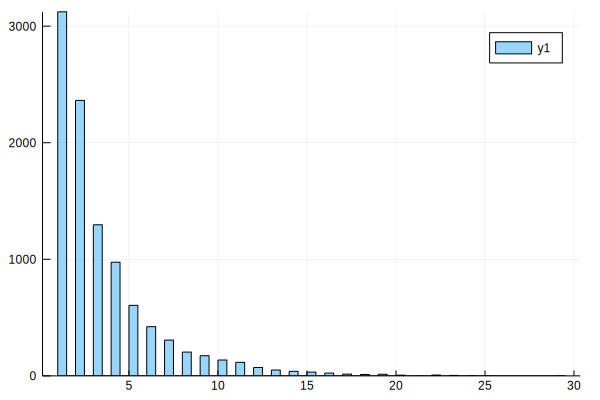

In [5]:
d = genData(4)
d = convert(Array{Float64,1},d)
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
 # looks like a gamma distribution.
#plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
histogram(d, fillalpha = 0.4)
#plot!(gammaFit, fill=(0, .5,:orange))

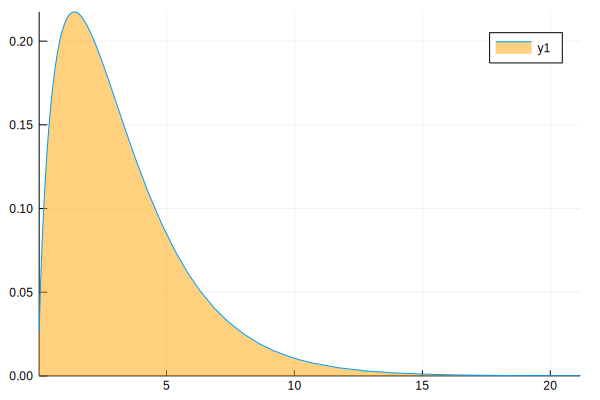

In [9]:
#plot(Gamma(params(gammaFit)), fill=(0, .5,:orange))# gamma with different shape parameter
prms = params(gammaFit)
plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
#plot(Normal(3,5), fill=(0, .5,:orange))

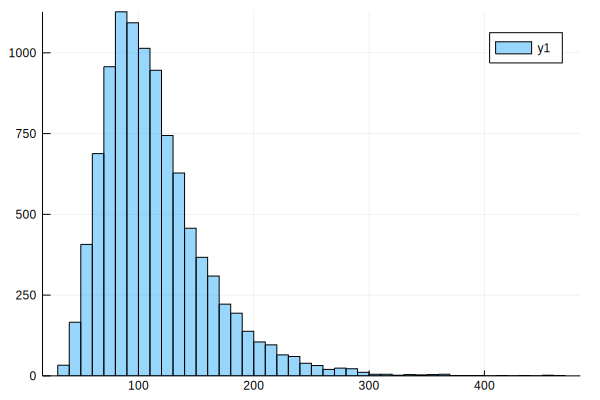

In [10]:
d = genData(50)
d = filter(x -> x > 0, convert(Array{Float64,1},d))
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
 # looks like a gamma distribution.
#plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
histogram(d,bins=40,fillalpha = 0.4)

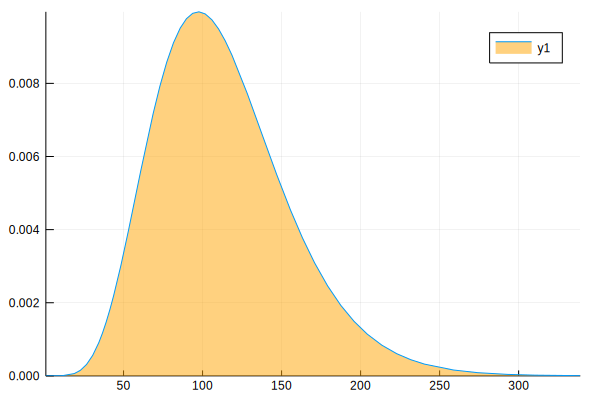

In [11]:
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))

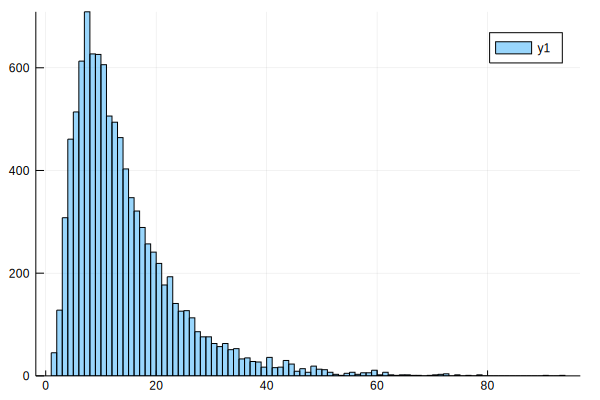

In [6]:
d = genData(10)
d = convert(Array{Float64,1},d)
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
 # looks like a gamma distribution.
#plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
histogram(d, fillalpha = 0.4)

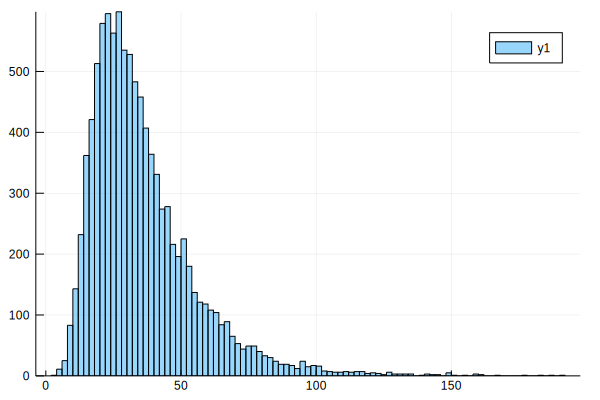

In [7]:
d = genData(20)
d = convert(Array{Float64,1},d)
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
 # looks like a gamma distribution.
#plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
histogram(d, fillalpha = 0.4)

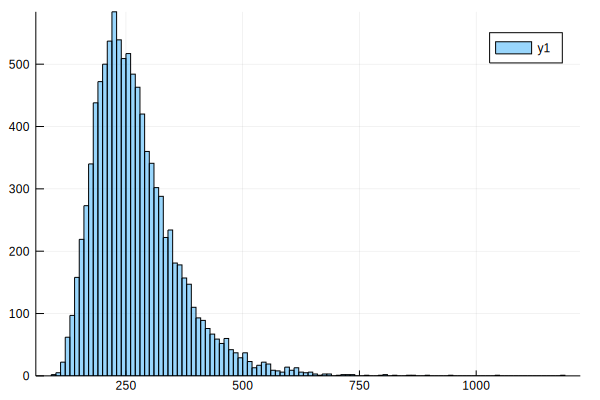

In [9]:
d = genData(100)
d = convert(Array{Float64,1},d)
gammaFit = fit(Gamma,d)
prms = params(gammaFit);
 # looks like a gamma distribution.
#plot(Gamma(prms[1],prms[2]), fill=(0, .5,:orange))
histogram(d, fillalpha = 0.4)